In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cpu'

Create some known data using linear regression.

Make a line with known parameter.

In [3]:
# known params
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Now we need a nn to accurately predict output y. We know it because its weight * X + Bias.
To do this lets establish our sets...

In [4]:
# We need to make sure data is split into training and test sets!
# Training set - Validation set - Test set

# Implement an 80/20 train test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions=None):
    """
    Plots training and test predictions.
    """
    plt.figure(figsize=(12, 8))

    plt.scatter(train_data, train_labels, c="b", s=4, label="training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="test data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

    plt.legend(prop={'size': 14})

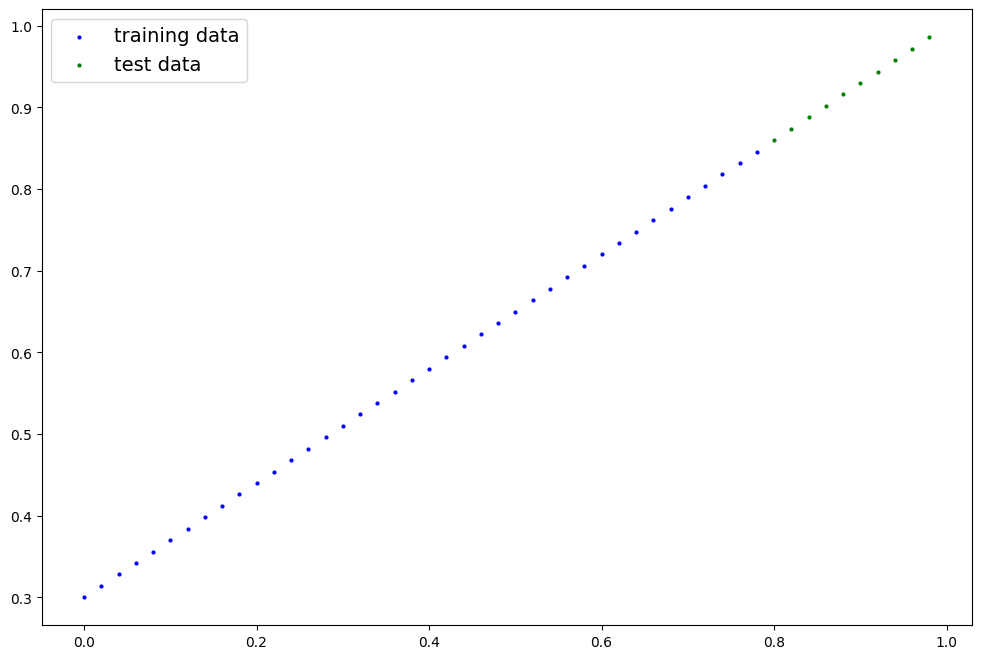

In [5]:
plot_predictions()

In [6]:
# Building our first model
# Specifically a linear regression model
# using gradient decent and back propagation

class LinearRegressionModel(nn.Module):

    def __init__(self):
        super().__init__()

        # these random number should be updated to reflect the training data...
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float)) # A tensor that is a module param
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # forward method to define computation in model
    # you must overwrite forward in all nn.module subclasses
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # run training data thru regression and return result
        return self.weights * x + self.bias # linear regression

In [7]:
# lets see whats inside our model

#create a seed so that the randomness of the weights and biases is uniform
torch.manual_seed(99)

# create instance of the model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.6127], requires_grad=True),
 Parameter containing:
 tensor([-1.1754], requires_grad=True)]

In [11]:
# making predictions with inference mode

with torch.no_grad():
    y_preds = model_0(X_test)
y_preds # Remember this has random weight and bias

tensor([[-0.6852],
        [-0.6730],
        [-0.6607],
        [-0.6484],
        [-0.6362],
        [-0.6239],
        [-0.6117],
        [-0.5994],
        [-0.5872],
        [-0.5749]])

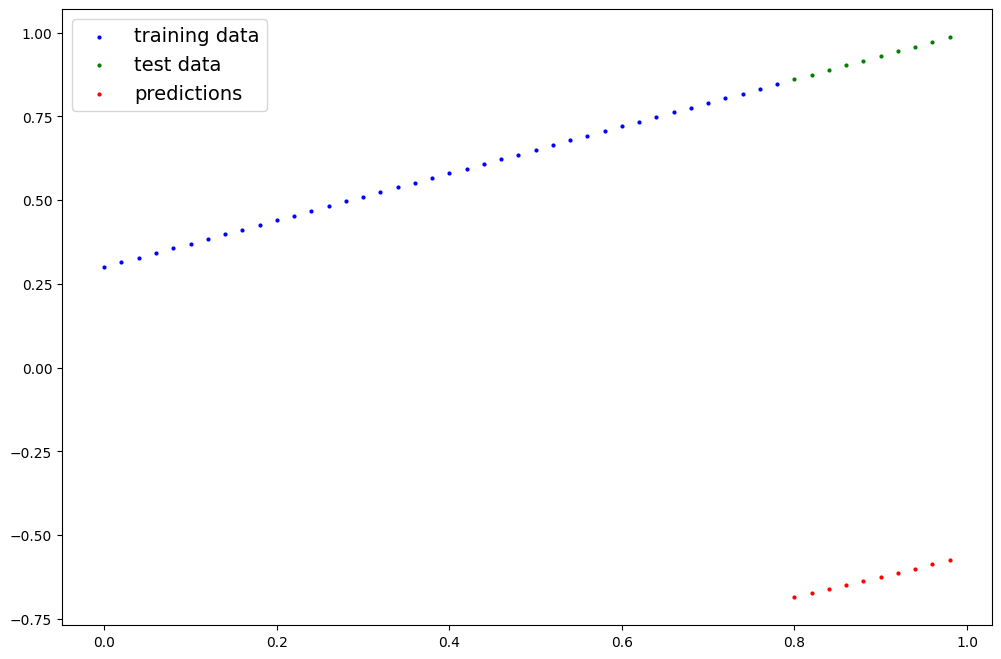

In [10]:
plot_predictions(predictions=y_preds)

The objective with training a model is to go from some unknown params to some known params. Or a poor representation to a good representation.

We need to be able to measure how badly the model performs or how wrong its predictions are. This is where the loss function comes in.

Out bias and weight will change so that the loss function is reduced. There are lots of loss functions in pytorch.nn.

L1Loss is good for regression models (mean absolute error)
Many optimizers are good we might use Adam for this one but SGD (Stochastic Gradient Decent) is probably better?

In [27]:
# setup a loss function and optimizer

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.00001)
# lr is learning rate
# params are the value to be changed

# lr is like a damping ratio kida.
# It is like a scalar for how fast to try and learn.

# Now we need a training loop and testing loop.

epochs = 200
for epoch in range(epochs):
    # put model in training mode
    model_0.train()


    y_preds = model_0(X_train) # forward pass (data tru forward method)
    loss = loss_fn(y_preds, y_train)
    print(loss)
    optimizer.zero_grad() # each epoch start fresh
    loss.backward() # back prop
    optimizer.step() # grad decent

    # Testing steps
    model_0.eval() # turns off gradient tracking


tensor(3.7946e-06, grad_fn=<MeanBackward0>)
tensor(7.7292e-06, grad_fn=<MeanBackward0>)
tensor(3.7946e-06, grad_fn=<MeanBackward0>)
tensor(7.7292e-06, grad_fn=<MeanBackward0>)
tensor(3.7946e-06, grad_fn=<MeanBackward0>)
tensor(7.7292e-06, grad_fn=<MeanBackward0>)
tensor(3.7946e-06, grad_fn=<MeanBackward0>)
tensor(7.7292e-06, grad_fn=<MeanBackward0>)
tensor(3.7946e-06, grad_fn=<MeanBackward0>)
tensor(7.7292e-06, grad_fn=<MeanBackward0>)
tensor(3.7946e-06, grad_fn=<MeanBackward0>)
tensor(7.7292e-06, grad_fn=<MeanBackward0>)
tensor(3.7946e-06, grad_fn=<MeanBackward0>)
tensor(7.7292e-06, grad_fn=<MeanBackward0>)
tensor(3.7946e-06, grad_fn=<MeanBackward0>)
tensor(7.7292e-06, grad_fn=<MeanBackward0>)
tensor(3.7946e-06, grad_fn=<MeanBackward0>)
tensor(7.7292e-06, grad_fn=<MeanBackward0>)
tensor(3.7946e-06, grad_fn=<MeanBackward0>)
tensor(7.7292e-06, grad_fn=<MeanBackward0>)
tensor(3.7946e-06, grad_fn=<MeanBackward0>)
tensor(7.7292e-06, grad_fn=<MeanBackward0>)
tensor(3.7946e-06, grad_fn=<Mean

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7803])), ('bias', tensor([0.3396]))])

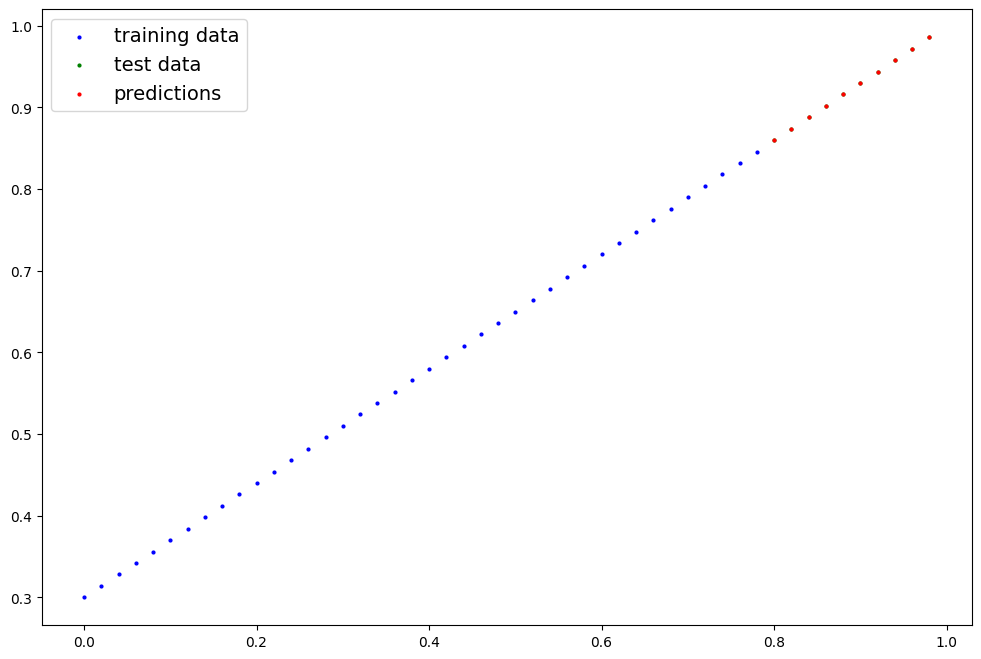

In [28]:
with torch.no_grad():
    y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

In [30]:
# Saving this model off and loading one in...

# methods...

# 1. torch.save()
torch.save(obj=model_0.state_dict(), f="model_0.pth")

# 2. loading in the state_dict to a new instance
model_0_0 = LinearRegressionModel()
model_0_0.load_state_dict(torch.load(f="model_0.pth"))

<All keys matched successfully>

In [31]:
# lets make a rediction with the loaded model
model_0_0.eval() # put model in evaluation mode
with torch.no_grad():
    y_preds_0 = model_0_0(X_test)
# compare them to og model
y_preds == y_preds_0

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])